# NREL DATA
## Import Libraries

In [2]:
# Upgrade the Package
!pip install --upgrade pip

# Package from the Python Package Index
!pip install pvlib

# Module netCDF4 was not found 
!pip install netCDF4

# Try to save Excel
!pip install openpyxl

# 4/20/2020: version 1.1.2 released. Code optimization, fix logic so only_use_cftime_datimes=False works as expected (issues #158 and #165). 
!pip install cftime==1.1.2

Requirement already up-to-date: pip in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (20.1)


In [3]:
# Make basic imports and then set the location and time range data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz
import seaborn as sns; sns.set_color_codes()
import datetime
import pvlib

# Import pvlib forecast models
from pvlib import solarposition
from pvlib.location import Location
from matplotlib.pyplot import figure
from matplotlib import pyplot
%matplotlib inline

# Specify Location (Denver, CO)
latitude, longitude, tz = 39.7, -105.2, 'America/Denver'


## May's First Week
### Irradiance 

In [4]:
# Read Irradiance data
nrel_df = pd.read_csv('First May Week.txt')
print("Keys of nrel_df: \n{}".format(nrel_df.keys()))

Keys of nrel_df: 
Index(['DATE (MM/DD/YYYY)', 'MST', 'Global Horizontal [W/m^2]',
       'Direct Normal [W/m^2]', 'Diffuse Horizontal [W/m^2]'],
      dtype='object')


In [5]:
# Columns Rename - Remove [ ]
nrel_df = nrel_df.rename(columns = {'Global Horizontal [W/m^2]': 'GHI', 'Direct Normal [W/m^2]': 'DNI', 'DATE (MM/DD/YYYY)': 'DATE', 'Diffuse Horizontal [W/m^2]': 'DHI'})

In [6]:
# Analyzing Data
# Global Horizonal & Direct Normal(W/m*2)
# Air Temperature (deg C)
nrel_df.describe()

,GHI,DNI,DHI
count,5760.000000,5760.000000,5760.000000
mean,307.378292,358.444281,66.787297
std,353.501062,390.173504,87.693903
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,125.830000,52.181100,44.923900
75%,639.314750,795.249500,99.757400
max,1111.820000,950.839000,448.036000


In [7]:
# Columns that contain NaN values (True = Nan value)
nrel_df.isnull().any()

DATE    False
MST     False
GHI     False
DNI     False
DHI     False
dtype: bool

In [8]:
nrel_df['Time'] = pd.to_datetime(nrel_df['MST'])

In [9]:
nrel_df['Time'].dt.hour + nrel_df['Time'].dt.minute/60

0        0.000000
1        0.016667
2        0.033333
3        0.050000
4        0.066667
5        0.083333
6        0.100000
7        0.116667
8        0.133333
9        0.150000
10       0.166667
11       0.183333
12       0.200000
13       0.216667
14       0.233333
15       0.250000
16       0.266667
17       0.283333
18       0.300000
19       0.316667
20       0.333333
21       0.350000
22       0.366667
23       0.383333
24       0.400000
25       0.416667
26       0.433333
27       0.450000
28       0.466667
29       0.483333
          ...    
5730    23.500000
5731    23.516667
5732    23.533333
5733    23.550000
5734    23.566667
5735    23.583333
5736    23.600000
5737    23.616667
5738    23.633333
5739    23.650000
5740    23.666667
5741    23.683333
5742    23.700000
5743    23.716667
5744    23.733333
5745    23.750000
5746    23.766667
5747    23.783333
5748    23.800000
5749    23.816667
5750    23.833333
5751    23.850000
5752    23.866667
5753    23.883333
5754    23

In [10]:
nrel_df['Time Float'] = nrel_df['Time'].dt.hour + nrel_df['Time'].dt.minute/60

In [11]:
nrel_df.rename(columns={'Time Float':'Hours', 'MST':'Time', 'Time':'MST'}, inplace=True)

In [12]:
nrel_df.head(10)

,DATE,Time,GHI,DNI,DHI,MST,Hours
0,5/4/2020,00:00,0.000000,0.0,0.000000,2020-05-11 00:00:00,0.000000
1,5/4/2020,00:01,0.037031,0.0,0.037031,2020-05-11 00:01:00,0.016667
2,5/4/2020,00:02,0.000000,0.0,0.000000,2020-05-11 00:02:00,0.033333
3,5/4/2020,00:03,0.037031,0.0,0.037031,2020-05-11 00:03:00,0.050000
4,5/4/2020,00:04,0.037031,0.0,0.037031,2020-05-11 00:04:00,0.066667
5,5/4/2020,00:05,0.000000,0.0,0.000000,2020-05-11 00:05:00,0.083333
6,5/4/2020,00:06,0.000000,0.0,0.000000,2020-05-11 00:06:00,0.100000
7,5/4/2020,00:07,0.000000,0.0,0.000000,2020-05-11 00:07:00,0.116667
8,5/4/2020,00:08,0.000000,0.0,0.000000,2020-05-11 00:08:00,0.133333
9,5/4/2020,00:09,0.037031,0.0,0.037031,2020-05-11 00:09:00,0.150000


In [13]:
nrel_df.tail(10)

,DATE,Time,GHI,DNI,DHI,MST,Hours
5750,5/7/2020,23:50,0.0,0.0,0.0,2020-05-11 23:50:00,23.833333
5751,5/7/2020,23:51,0.0,0.0,0.0,2020-05-11 23:51:00,23.850000
5752,5/7/2020,23:52,0.0,0.0,0.0,2020-05-11 23:52:00,23.866667
5753,5/7/2020,23:53,0.0,0.0,0.0,2020-05-11 23:53:00,23.883333
5754,5/7/2020,23:54,0.0,0.0,0.0,2020-05-11 23:54:00,23.900000
5755,5/7/2020,23:55,0.0,0.0,0.0,2020-05-11 23:55:00,23.916667
5756,5/7/2020,23:56,0.0,0.0,0.0,2020-05-11 23:56:00,23.933333
5757,5/7/2020,23:57,0.0,0.0,0.0,2020-05-11 23:57:00,23.950000
5758,5/7/2020,23:58,0.0,0.0,0.0,2020-05-11 23:58:00,23.966667
5759,5/7/2020,23:59,0.0,0.0,0.0,2020-05-11 23:59:00,23.983333


In [14]:
nrel_df = nrel_df[["DATE","MST","Time","Hours","GHI","DHI","DNI"]]

In [15]:
nrel_df.head()

,DATE,MST,Time,Hours,GHI,DHI,DNI
0,5/4/2020,2020-05-11 00:00:00,00:00,0.000000,0.000000,0.000000,0.0
1,5/4/2020,2020-05-11 00:01:00,00:01,0.016667,0.037031,0.037031,0.0
2,5/4/2020,2020-05-11 00:02:00,00:02,0.033333,0.000000,0.000000,0.0
3,5/4/2020,2020-05-11 00:03:00,00:03,0.050000,0.037031,0.037031,0.0
4,5/4/2020,2020-05-11 00:04:00,00:04,0.066667,0.037031,0.037031,0.0


In [16]:
nrel_df.tail()

,DATE,MST,Time,Hours,GHI,DHI,DNI
5755,5/7/2020,2020-05-11 23:55:00,23:55,23.916667,0.0,0.0,0.0
5756,5/7/2020,2020-05-11 23:56:00,23:56,23.933333,0.0,0.0,0.0
5757,5/7/2020,2020-05-11 23:57:00,23:57,23.950000,0.0,0.0,0.0
5758,5/7/2020,2020-05-11 23:58:00,23:58,23.966667,0.0,0.0,0.0
5759,5/7/2020,2020-05-11 23:59:00,23:59,23.983333,0.0,0.0,0.0


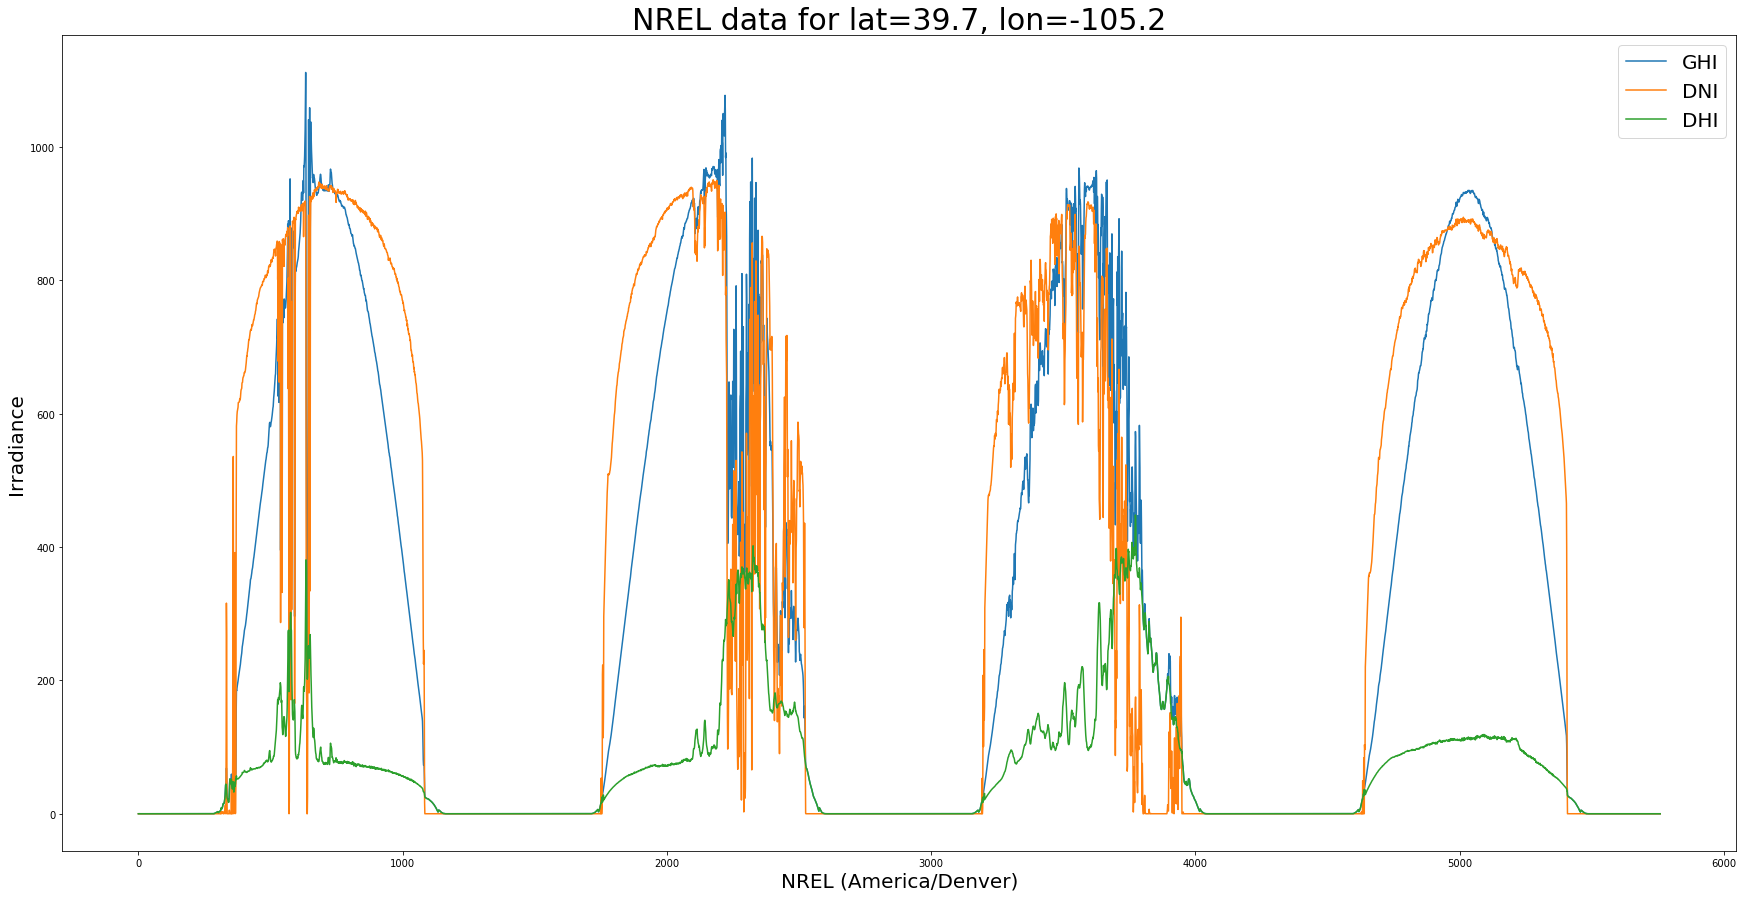

In [17]:
# Plot cloud cover percentages
irrad_var = ['GHI', 'DNI','DHI']
nrel_df[irrad_var].plot(figsize=(30,15));
plt.ylabel('Irradiance',size=20);
plt.xlabel('NREL ({})'.format(tz),size=20);
plt.title('NREL data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

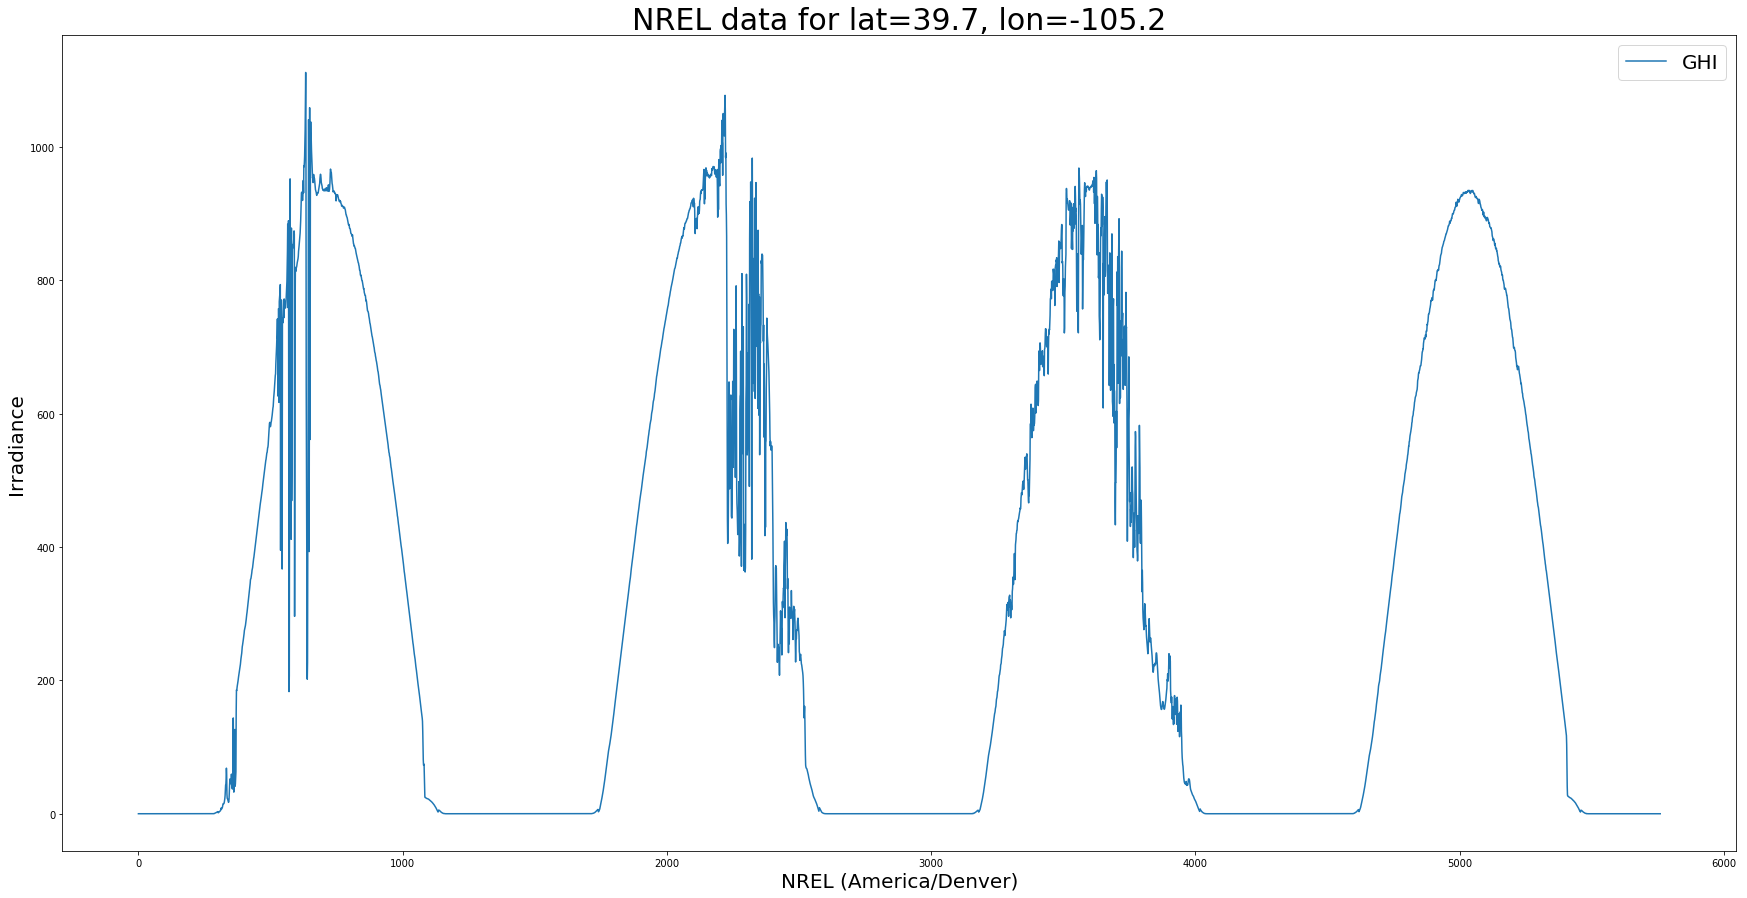

In [18]:
# Plot cloud cover percentages
irrad_var = ['GHI']
nrel_df[irrad_var].plot(figsize=(30,15));
plt.ylabel('Irradiance',size=20);
plt.xlabel('NREL ({})'.format(tz),size=20);
plt.title('NREL data for lat={}, lon={}'.format(latitude, longitude),size=30);
plt.legend(prop={'size': 20});

In [19]:
nrel_df_slice = nrel_df.iloc[::180]

In [20]:
nrel_df_slice

,DATE,MST,Time,Hours,GHI,DHI,DNI
0,5/4/2020,2020-05-11 00:00:00,00:00,0.0,0.000000,0.000000,0.0000
180,5/4/2020,2020-05-11 03:00:00,03:00,3.0,0.000000,0.000000,0.0000
360,5/4/2020,2020-05-11 06:00:00,06:00,6.0,83.887600,37.305700,251.1560
540,5/4/2020,2020-05-11 09:00:00,09:00,9.0,731.794000,173.470000,791.1010
720,5/4/2020,2020-05-11 12:00:00,12:00,12.0,937.108000,80.719700,933.6680
900,5/4/2020,2020-05-11 15:00:00,15:00,15.0,679.509000,67.309100,878.8570
1080,5/4/2020,2020-05-11 18:00:00,18:00,18.0,72.953000,32.561600,231.9690
1260,5/4/2020,2020-05-11 21:00:00,21:00,21.0,0.037035,0.037035,0.0000
1440,5/5/2020,2020-05-11 00:00:00,00:00,0.0,0.000000,0.000000,0.0000
1620,5/5/2020,2020-05-11 03:00:00,03:00,3.0,0.000000,0.000000,0.0000


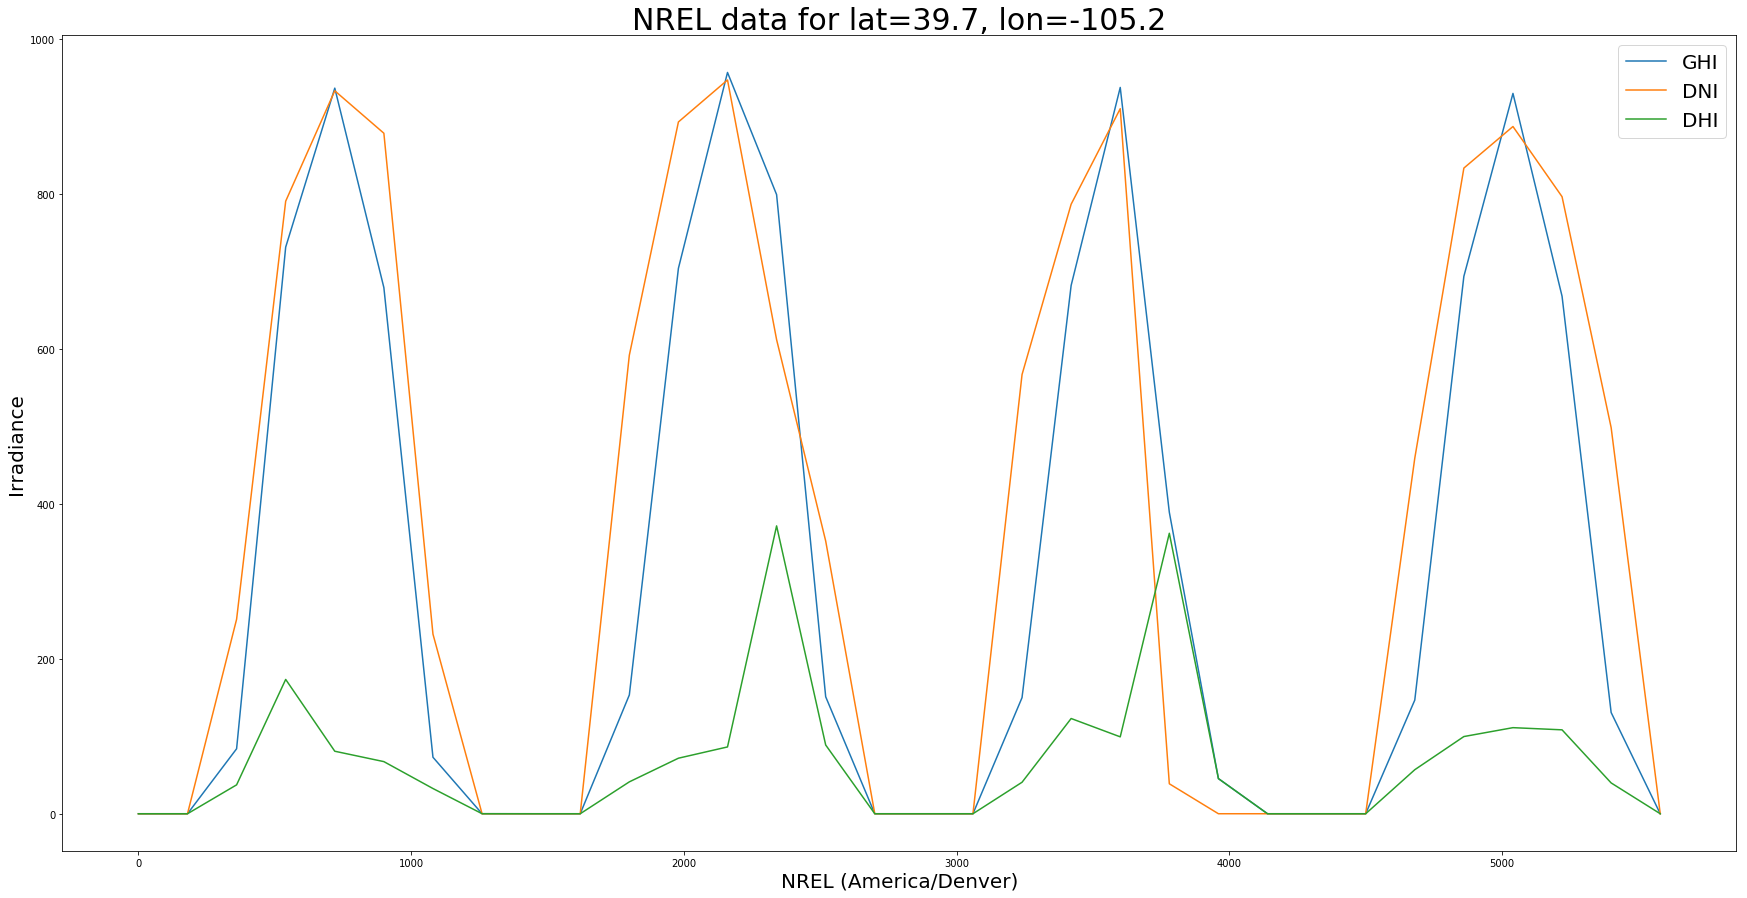

In [21]:
# Plot cloud cover percentages
irrad_var = ['GHI', 'DNI','DHI']
nrel_df_slice[irrad_var].plot(figsize=(30,15));
plt.ylabel('Irradiance', size=20);
plt.xlabel('NREL ({})'.format(tz), size=20);
plt.title('NREL data for lat={}, lon={}'.format(latitude, longitude), size=30);
plt.legend(prop={'size': 20});

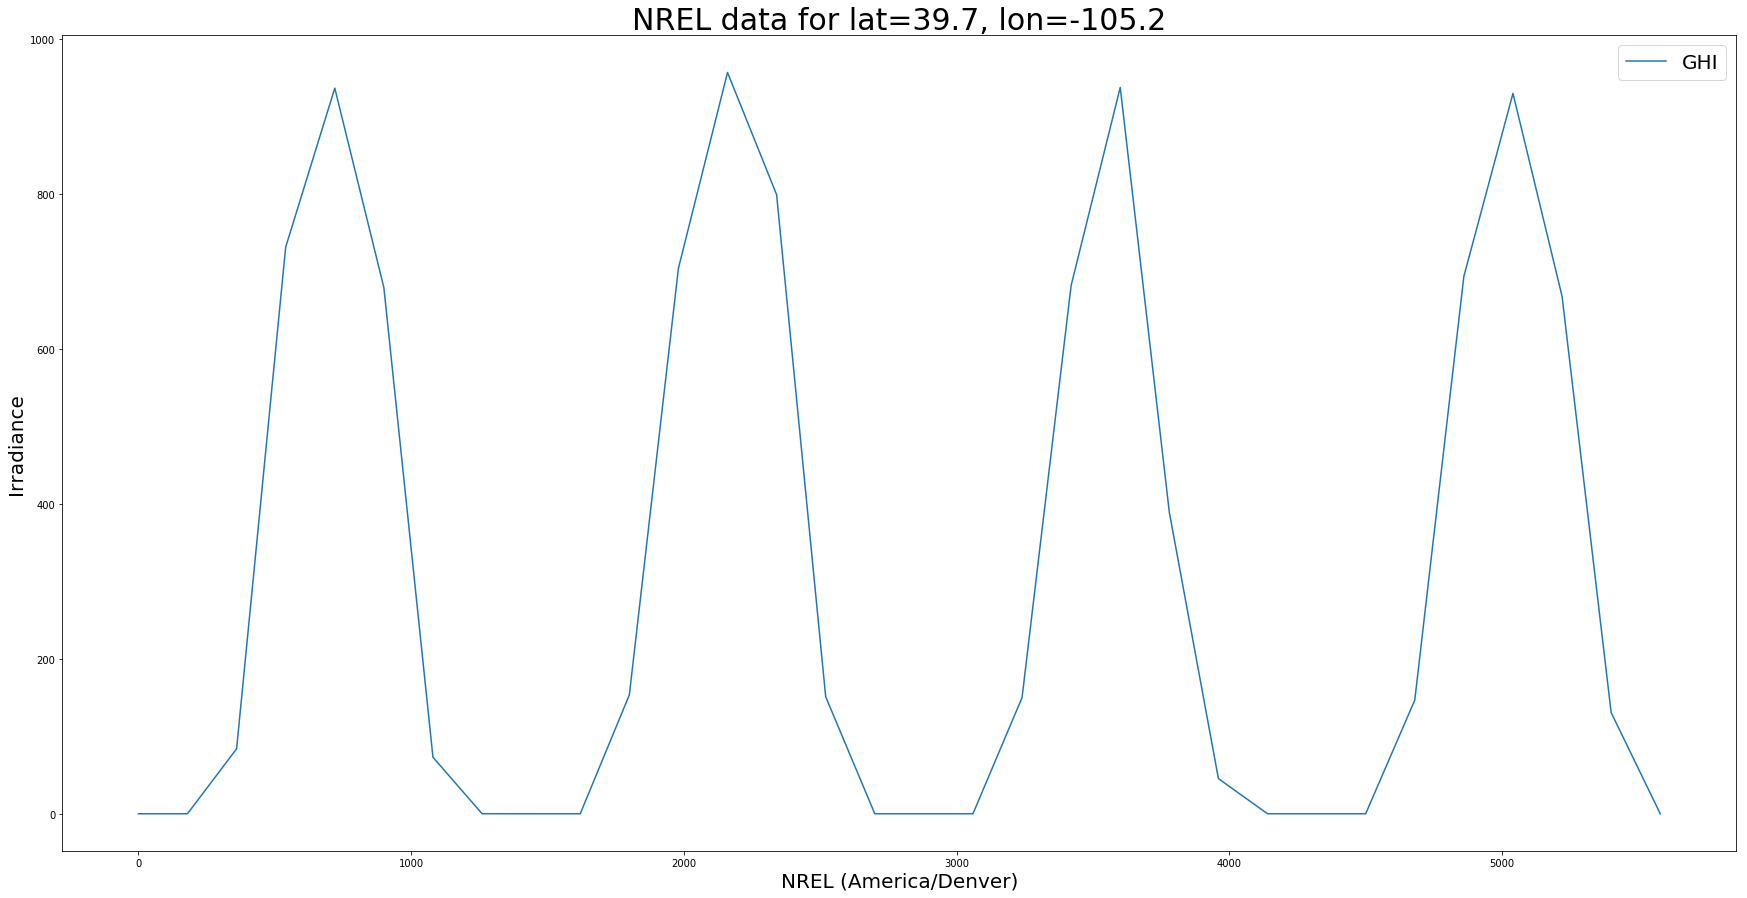

In [22]:
# Plot cloud cover percentages
irrad_var = ['GHI']
nrel_df_slice[irrad_var].plot(figsize=(30,15));
plt.ylabel('Irradiance', size=20);
plt.xlabel('NREL ({})'.format(tz), size=20);
plt.title('NREL data for lat={}, lon={}'.format(latitude, longitude), size=30);
plt.legend(prop={'size': 20});

# PV System
## Design Philosophy
<p>The PVSystem class allows modelers to easily separate the data that represents a PV system from the data that influences the PV system.
<p>The data that represents the PV system is intrinsic. The data that influences the PV system is extrinsic.
<p>Intrinsic data is stored in object attributes. For example, the data that describes a PV system’s module parameters is stored in PVSystem.module_parameters.</p>

In [23]:
module_parameters = {'pdc0': 10, 'gamma_pdc': -0.004}

In [24]:
system = pvlib.pvsystem.PVSystem(module_parameters=module_parameters)

In [25]:
print(system.module_parameters)

{'pdc0': 10, 'gamma_pdc': -0.004}


In [26]:
pdc = system.pvwatts_dc(1000, 30)

In [27]:
print(pdc)

9.8


In [28]:
system.module_parameters['temp_ref'] = 0

In [29]:
# lower temp_ref should lead to lower DC power than calculated above
pdc = system.pvwatts_dc(1000, 30)

In [30]:
print(pdc)

8.8


## PV System Attributes

In [31]:
# 20 deg tilt, south-facing
system = pvlib.pvsystem.PVSystem(surface_tilt=20, surface_azimuth=180)

In [32]:
print(system.surface_tilt, system.surface_azimuth)

20 180


In [33]:
# call get_aoi with solar_zenith, solar_azimuth
aoi = system.get_aoi(30, 180)

In [34]:
print(aoi)

9.999999999999975


In [35]:
# retrieve_sam returns a dict. the dict keys are module names,
# and the values are model parameters for that module
modules = pvlib.pvsystem.retrieve_sam('cecmod')
module_parameters = modules['Canadian_Solar_Inc__CS5P_220M']
inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
inverter_parameters = inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']
system = pvlib.pvsystem.PVSystem(module_parameters=module_parameters, inverter_parameters=inverter_parameters)

In [36]:
# crude numbers from a single module
data = pd.DataFrame({'v_mp': 8, 'v_oc': 10, 'i_mp': 5, 'i_x': 6, 'i_xx': 4, 'i_sc': 7, 'p_mp': 40}, index=[0])
data_scaled = system.scale_voltage_current_power(data)
print(data_scaled)

   v_mp  v_oc  i_mp  i_x  i_xx  i_sc  p_mp
0     8    10     5    6     4     7    40


# Model Chain
## Example - Import Libraries

In [37]:
# Import pvlib
from pvlib.pvsystem import PVSystem, retrieve_sam
from pvlib.location import Location
from pvlib.modelchain import ModelChain
from pvlib.tracking import SingleAxisTracker
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

In [41]:
# Load some module and inverter specifications
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
sandia_module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
cec_inverter = cec_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']
inverter = cec_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

# model a big tracker for more fun
tracker = SingleAxisTracker(module_parameters=module, inverter_parameters=inverter, temperature_model_parameters=temperature_model_parameters, modules_per_string=15, strings_per_inverter=300)

# Create Location object, a PVSystem and a ModuleChain
location = Location(latitude=39.7, longitude=-105.2)
system = PVSystem(surface_tilt=20, surface_azimuth=200, module_parameters=sandia_module, inverter_parameters=cec_inverter, temperature_model_parameters=temperature_model_parameters)
mc = ModelChain(system, location)

In [61]:
# Print the Model Chain
print(mc)

ModelChain: 
  name: None
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses


In [43]:
# Specify time range
start = pd.Timestamp(datetime.date.today(), tz=tz)
end = start + pd.Timedelta(days=4)
irrad_vars = ['ghi','dni','dhi']

# Run Model with simple Data 
weather = pd.DataFrame([[1050, 1000, 100, 30, 5]], columns=['ghi', 'dni', 'dhi', 'temp_air', 'wind_speed'], index=[pd.Timestamp('20200505 1200', tz='America/Denver')])
mc.run_model(weather);

In [44]:
mc.aoi

2020-05-05 12:00:00-06:00    20.811958
Name: aoi, dtype: float64

In [45]:
mc.cell_temperature

2020-05-05 12:00:00-06:00    57.299137
dtype: float64

In [46]:
mc.dc

,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
2020-05-05 12:00:00-06:00,5.345029,4.737896,52.390973,40.746596,193.05312,5.224805,3.327979


In [47]:
mc.ac

2020-05-05 12:00:00-06:00    185.930384
dtype: float64

# PV Power Forecast

In [48]:
# fx is a common abbreviation for forecast
fx_model = GFS()
fx_data = fx_model.get_processed_data(latitude, longitude, start, end)
ac_data = fx_data.resample('5min').interpolate()

# use a ModelChain object to calculate modeling intermediates
mc = ModelChain(system, fx_model.location)

# extract relevant data for model chain
mc.run_model(ac_data)

NameError: name 'GFS' is not defined

### ModelChain Attributes

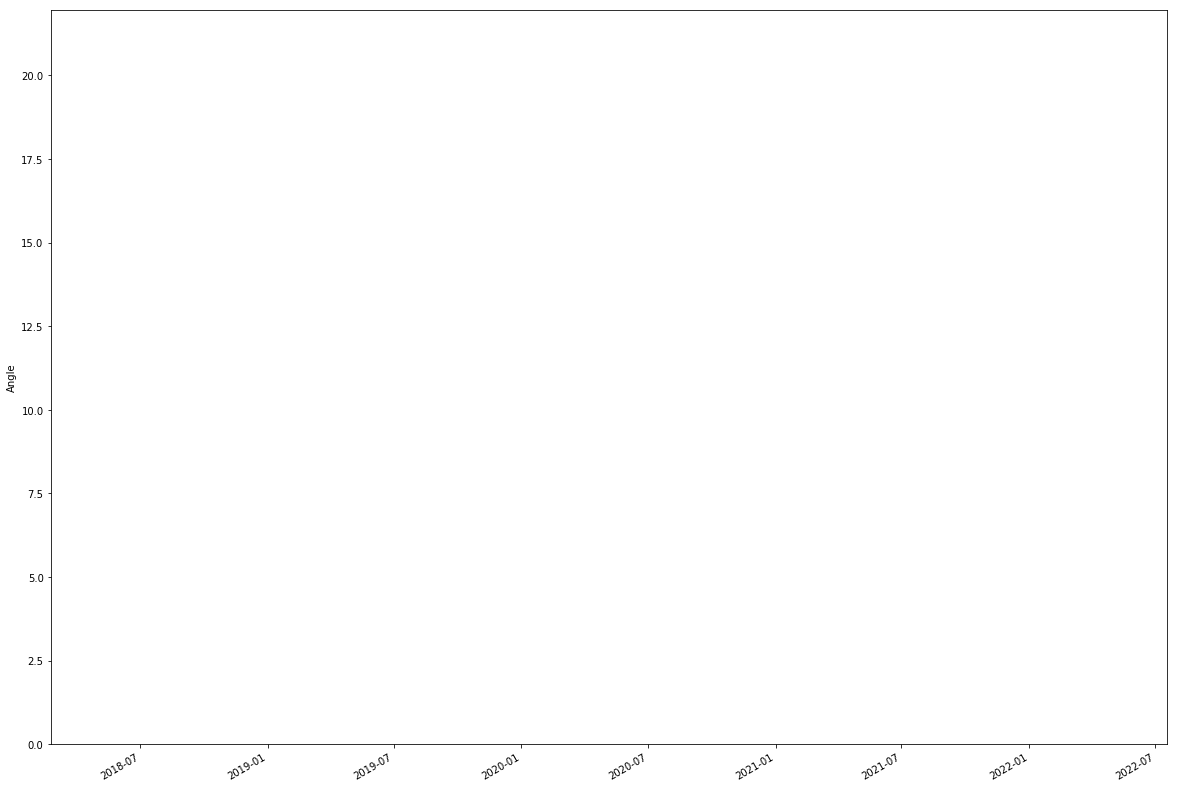

In [49]:
# ModelChain sotres modeling results on a series of attributes. 
# Angle of Incidence
mc.aoi.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('Angle');

In [50]:
## Modeling intermediates & Forecast Power

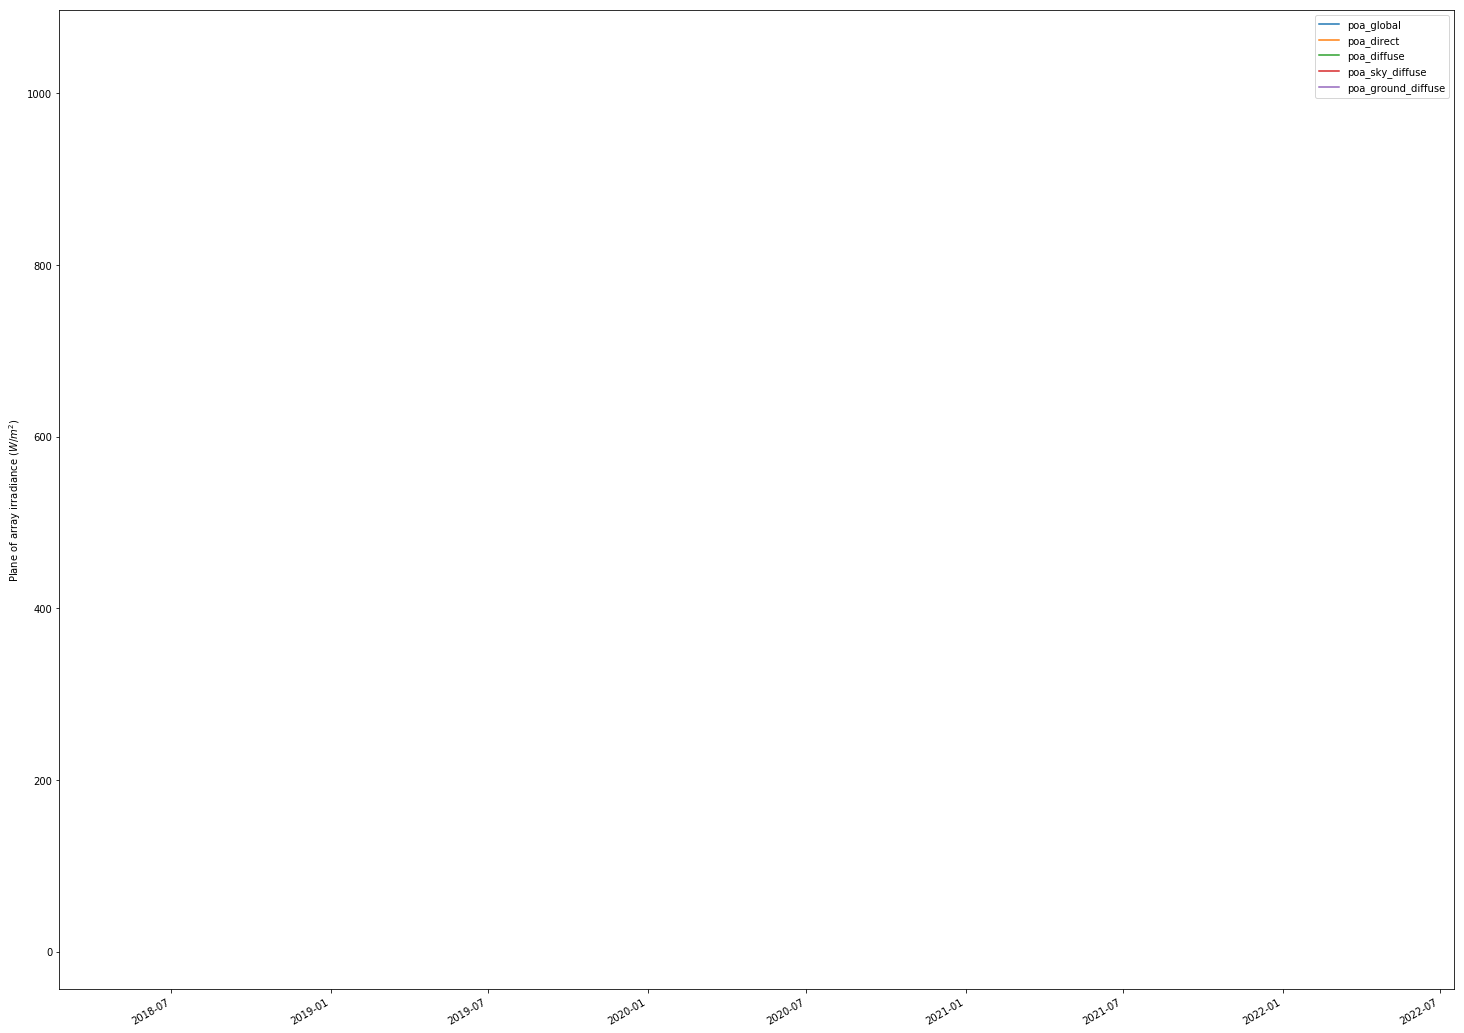

In [51]:
mc.total_irrad.plot(figsize=(25,20));
plt.ylabel('Plane of array irradiance ($W/m^2$)');
plt.legend(loc='best');

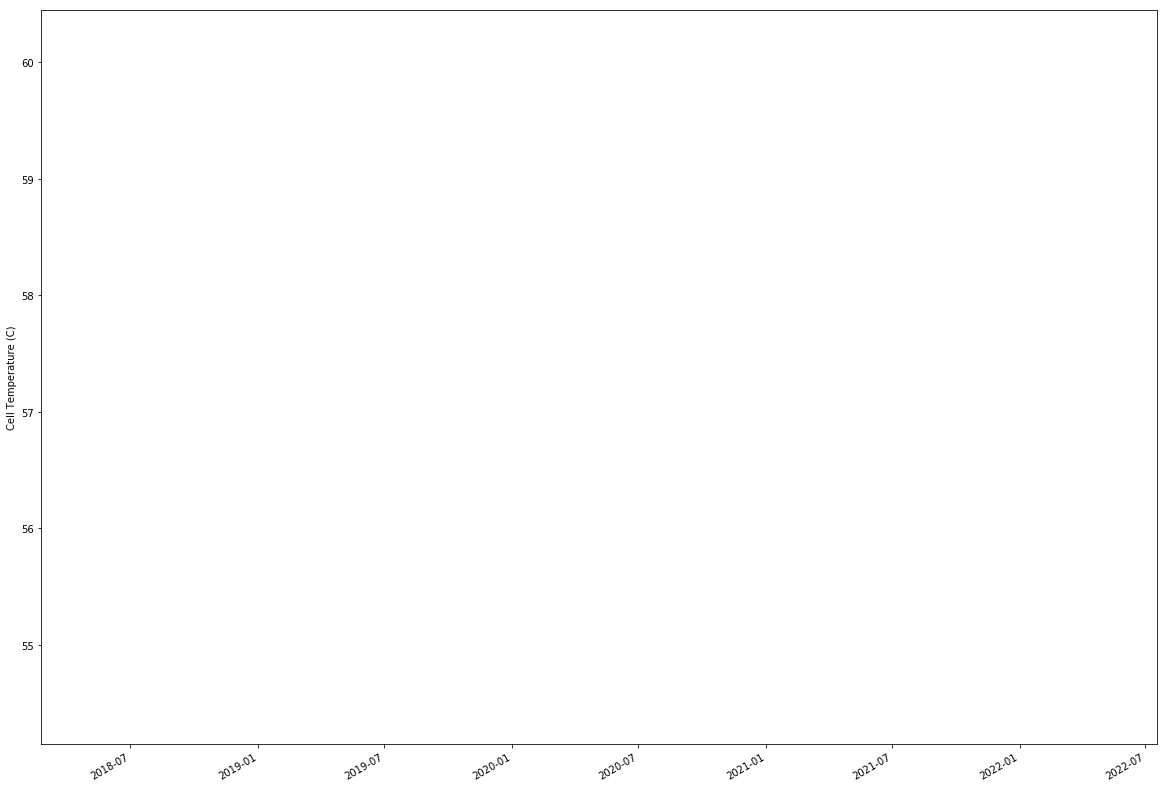

In [52]:
# Cell and module temperature
mc.cell_temperature.plot(figsize=(20,15));
plt.ylabel('Cell Temperature (C)');

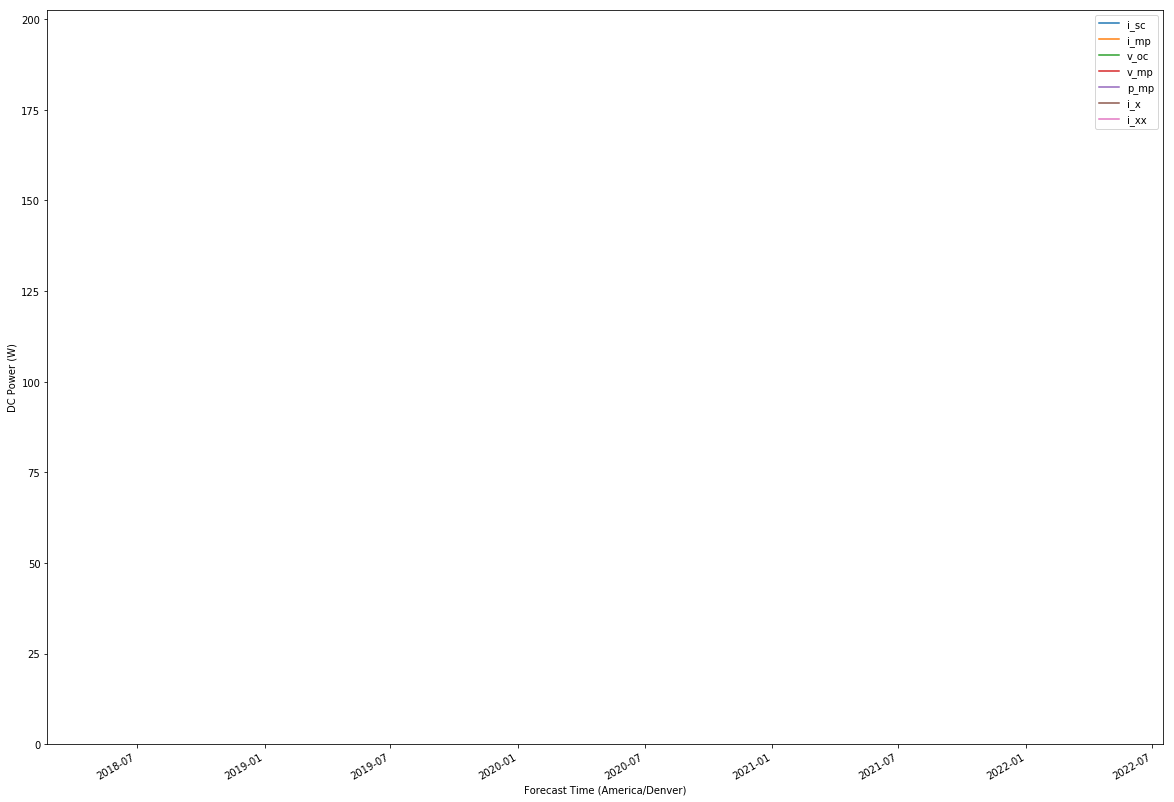

In [53]:
mc.dc.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('DC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [54]:
mc.dc.describe()

,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
count,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
mean,5.345029,4.737896,52.390973,40.746596,193.05312,5.224805,3.327979
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.345029,4.737896,52.390973,40.746596,193.05312,5.224805,3.327979
25%,5.345029,4.737896,52.390973,40.746596,193.05312,5.224805,3.327979
50%,5.345029,4.737896,52.390973,40.746596,193.05312,5.224805,3.327979
75%,5.345029,4.737896,52.390973,40.746596,193.05312,5.224805,3.327979
max,5.345029,4.737896,52.390973,40.746596,193.05312,5.224805,3.327979


In [55]:
mc.dc.fillna(0)

,i_sc,i_mp,v_oc,v_mp,p_mp,i_x,i_xx
2020-05-05 12:00:00-06:00,5.345029,4.737896,52.390973,40.746596,193.05312,5.224805,3.327979


In [56]:
mc.dc.fillna(0).to_csv('5 min DC.csv', encoding='utf-8')

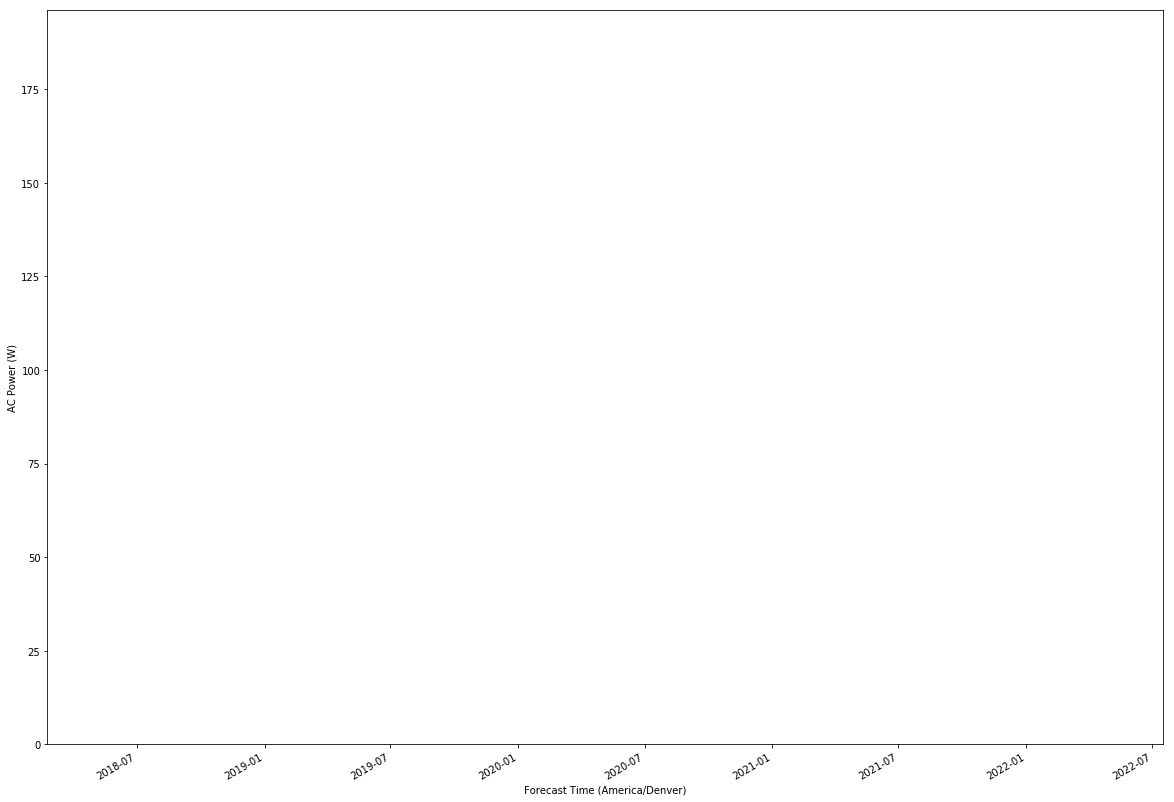

In [57]:
# AC Power
mc.ac.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('AC Power (W)');
plt.xlabel('Forecast Time ({})'.format(tz));

In [58]:
mc.ac.fillna(0)

2020-05-05 12:00:00-06:00    185.930384
dtype: float64

In [59]:
mc.ac.describe()

count      1.000000
mean     185.930384
std             NaN
min      185.930384
25%      185.930384
50%      185.930384
75%      185.930384
max      185.930384
dtype: float64

In [60]:
mc.ac.fillna(0).to_csv('5 min AC.csv', encoding='utf-8')